## Import libraries

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Load data from csv into a dataframe
This data contains statewise gender specific number of persons arrested, charge-sheeted, convicted, discharged and acquitted.

**Genders**: Male, Female, Transgender

### Accused Statuses
- **Arrested**: Seized by legal authority and taken into custody
- **Charge-Sheeted**: Charges are framed on the accused by the magistrate
- **Convicted**: Accused has been declared guilty
- **Discharged**: Not enough grounds to lead the proceedings against the accused
- **Acquitted**: Accused is not guilty of the offence

In [3]:
data = pd.read_csv('./NCRB-2021_Table_3A.10.csv')
data

,Sl. No. Col. (1),State/UT Col. (2),Persons Arrested - Male - Col. (3),Persons Arrested - Female - Col. (4),Persons Arrested - Transgender - Col. (5),Persons Arrested - Total - Col. (6),Persons Charge sheeted - Male - Col. (7),Persons Charge sheeted - Female - Col. (8),Persons Charge sheeted - Transgender - Col. (9),Persons Charge sheeted - Total - Col. (10),...,Persons Convicted - Transgender - Col. (13),Persons Convicted - Total - Col. (14),Persons Discharged - Male - Col. (15),Persons Discharged - Female - Col. (16),Persons Discharged - Transgender - Col. (17),Persons Discharged - Total - Col. (18),Persons Acquitted - Male - Col. (19),Persons Acquitted - Female - Col. (20),Persons Acquitted - Transgender - Col. (21),Persons Acquitted - Total - Col. (22)
0,1,Andhra Pradesh,16048,3037,0,19085,31674,7594,0,39268,...,0,297,5,2,0,7,7376,1789,0,9165
1,2,Arunachal Pradesh,355,15,0,370,305,11,0,316,...,0,22,32,0,0,32,12,2,0,14
2,3,Assam,34555,367,1,34923,21582,295,0,21877,...,0,185,3,0,0,3,4478,100,0,4578
3,4,Bihar,14250,1435,0,15685,14788,1658,0,16446,...,0,630,40,2,0,42,822,55,0,877
4,5,Chhattisgarh,8952,998,0,9950,8761,920,0,9681,...,0,1042,129,18,0,147,2120,187,0,2307
5,6,Goa,177,9,0,186,243,27,0,270,...,0,7,18,3,0,21,81,7,0,88
6,7,Gujarat,10356,3150,0,13506,11621,4043,0,15664,...,0,183,20,7,0,27,4624,1557,0,6181
7,8,Haryana,12195,1239,0,13434,11728,1202,0,12930,...,0,586,0,0,0,0,2992,304,0,3296
8,9,Himachal Pradesh,1200,209,0,1409,1781,416,0,2197,...,0,85,1,0,0,1,388,56,0,444
9,10,Jharkhand,6839,461,0,7300,7029,429,0,7458,...,0,720,37,2,0,39,672,34,0,706


## Clean data by removing the columns with cumulative sums

In [4]:
df = data.drop([28, 37, 38])
df.describe()

,Persons Arrested - Male - Col. (3),Persons Arrested - Female - Col. (4),Persons Arrested - Transgender - Col. (5),Persons Arrested - Total - Col. (6),Persons Charge sheeted - Male - Col. (7),Persons Charge sheeted - Female - Col. (8),Persons Charge sheeted - Transgender - Col. (9),Persons Charge sheeted - Total - Col. (10),Persons Convicted - Male - Col. (11),Persons Convicted - Female - Col. (12),Persons Convicted - Transgender - Col. (13),Persons Convicted - Total - Col. (14),Persons Discharged - Male - Col. (15),Persons Discharged - Female - Col. (16),Persons Discharged - Transgender - Col. (17),Persons Discharged - Total - Col. (18),Persons Acquitted - Male - Col. (19),Persons Acquitted - Female - Col. (20),Persons Acquitted - Transgender - Col. (21),Persons Acquitted - Total - Col. (22)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.0,36.000000
mean,11353.583333,1175.527778,0.111111,12529.222222,14087.138889,1937.722222,0.083333,16024.944444,904.277778,45.555556,0.0,949.833333,154.722222,16.138889,0.0,170.861111,2656.472222,380.250000,0.0,3036.722222
std,16628.006501,1652.145868,0.398410,18005.334919,20502.955872,2935.999763,0.368394,23043.669094,2440.730518,131.097008,0.0,2568.214060,445.099386,40.649831,0.0,484.384390,3468.169937,618.461472,0.0,4015.482107
min,23.000000,0.000000,0.000000,23.000000,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.0,3.000000
25%,256.250000,13.500000,0.000000,279.500000,197.750000,10.750000,0.000000,228.250000,23.500000,0.000000,0.0,23.500000,0.750000,0.000000,0.0,0.750000,55.500000,2.000000,0.0,57.250000
50%,6650.000000,554.500000,0.000000,7204.500000,6691.000000,497.000000,0.000000,7226.000000,191.500000,4.500000,0.0,192.000000,4.000000,0.000000,0.0,4.500000,747.000000,56.000000,0.0,791.500000
75%,14714.500000,1479.500000,0.000000,16144.000000,21374.250000,2397.000000,0.000000,22996.500000,580.500000,27.250000,0.0,597.000000,46.250000,8.000000,0.0,49.250000,4283.750000,364.250000,0.0,4672.250000
max,86921.000000,6471.000000,2.000000,93392.000000,99707.000000,10969.000000,2.000000,109261.000000,13325.000000,699.000000,0.0,14024.000000,2262.000000,196.000000,0.0,2458.000000,10607.000000,2340.000000,0.0,12918.000000


## 1. Scatter Plot (using matplotlib)

Here we are plotting the data of **Male** *versus* **Female** across the 5 categories of the data

Scatter plots help display relationship between 2 features. If they follow a particular trend, then they are correlated (strong correlation) else they are not correlated (weak correlation).

From the scatter plots below we can see that there is no (weak) correlation between **male** and **female** across all the 5 categories. Hence they can be considered independent of each other.

In [5]:
df1 = df.iloc[:,2:4]
df2 = df.iloc[:,6:8]
df3 = df.iloc[:,10:12]
df4 = df.iloc[:,14:16]
df5 = df.iloc[:,18:20]

n1 = df1.sort_values(df1.columns[0]).to_numpy()
n2 = df2.sort_values(df2.columns[0]).to_numpy()
n3 = df3.sort_values(df3.columns[0]).to_numpy()
n4 = df4.sort_values(df4.columns[0]).to_numpy()
n5 = df5.sort_values(df5.columns[0]).to_numpy()

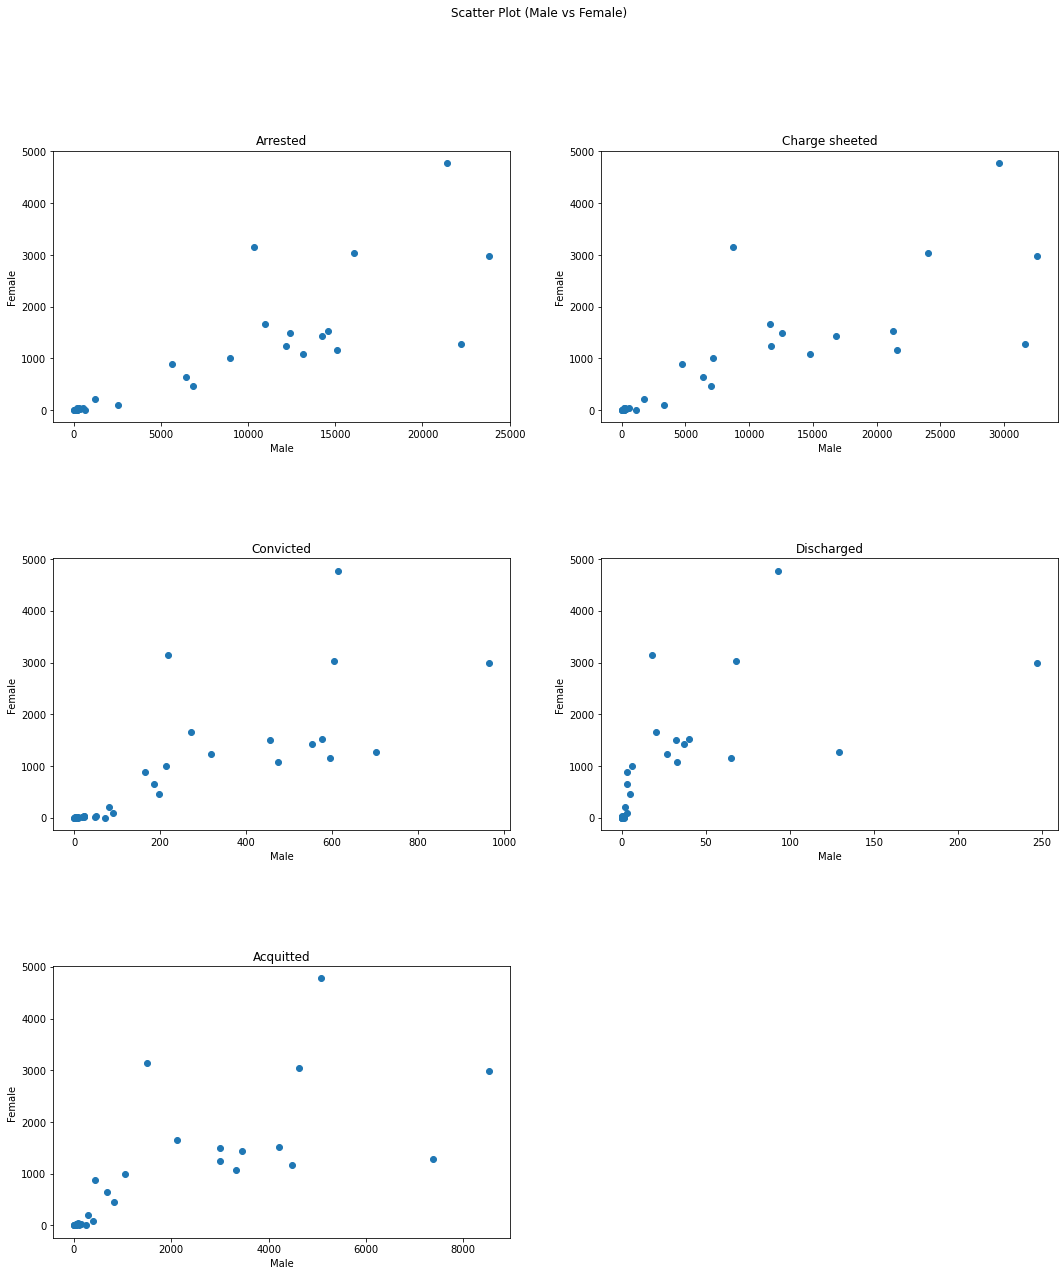

In [6]:
fig, ax = plt.subplots(3,2, figsize=(18, 20))

# ignoring the largest 4 values to remove the outliers
ax[0][0].scatter(n1[:-4, 0:1], n1[:-4, 1:2])
ax[0][0].set_title("Arrested")
ax[0][0].set_xlabel("Male")
ax[0][0].set_ylabel("Female")

ax[0][1].scatter(n2[:-4, 0:1], n1[:-4, 1:2])
ax[0][1].set_title("Charge sheeted")
ax[0][1].set_xlabel("Male")
ax[0][1].set_ylabel("Female")

ax[1][0].scatter(n3[:-4, 0:1], n1[:-4, 1:2])
ax[1][0].set_title("Convicted")
ax[1][0].set_xlabel("Male")
ax[1][0].set_ylabel("Female")

ax[1][1].scatter(n4[:-4, 0:1], n1[:-4, 1:2])
ax[1][1].set_title("Discharged")
ax[1][1].set_xlabel("Male")
ax[1][1].set_ylabel("Female")

ax[2][0].scatter(n5[:-4, 0:1], n1[:-4, 1:2])
ax[2][0].set_title("Acquitted")
ax[2][0].set_xlabel("Male")
ax[2][0].set_ylabel("Female")

ax[2][1].axis("off")

fig.suptitle("Scatter Plot (Male vs Female)")
plt.subplots_adjust(hspace=0.5)

## Get gender specific data from the main data

Since the geneder specific data are independent, we can create separate dataframes to get further intuition into the data

In [7]:
categories = ["Arrested", "Charge sheeted", "Convicted", "Discharged", "Acquitted"]

# male
df_m = df.iloc[:, 2::4]
df_m.columns = categories

# female
df_f = df.iloc[:, 3::4]
df_f.columns = categories

# total
df_t = df.iloc[:, 5::4]
df_t.columns = categories
df_t.head(10)

,Arrested,Charge sheeted,Convicted,Discharged,Acquitted
0,19085,39268,297,7,9165
1,370,316,22,32,14
2,34923,21877,185,3,4578
3,15685,16446,630,42,877
4,9950,9681,1042,147,2307
5,186,270,7,21,88
6,13506,15664,183,27,6181
7,13434,12930,586,0,3296
8,1409,2197,85,1,444
9,7300,7458,720,39,706


## 2. Line Plot

Here we are plotting the data of **Arrested** *versus* **Convicted**

Line Plots are best-suited in displaying trends and patterns of variables in data.

From the line plots below we can see that with increase in number of arrested people, number of convicted increases in general (excluding the outliers)

(0.0, 1.0, 0.0, 1.0)

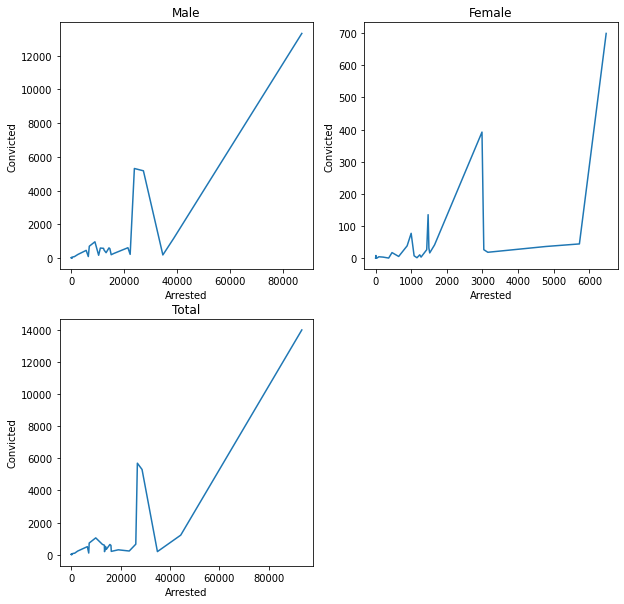

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.lineplot(x="Arrested", y="Convicted", data=df_t, ax=ax[1,0])
ax[1][0].set_title("Total")

sns.lineplot(x="Arrested", y="Convicted", data=df_m, ax=ax[0,0])
ax[0][0].set_title("Male")

sns.lineplot(x="Arrested", y="Convicted", data=df_f, ax=ax[0,1])
ax[0][1].set_title("Female")

ax[1,1].axis("off")

## 3. Bar Plot

Here we are plotting the data of number of people in each category for **male**, **female** and **total**

For data with different categories, a bar graph is execellent for displaying the data.

From the bar plots below we can see that out of the large number of people charge sheeted, most are arrested and out of which majority are acquitted due to lack of evidence. The actual percentage of people actually punished (convicted) is very low.

Text(0, 0.5, 'Number of persons')

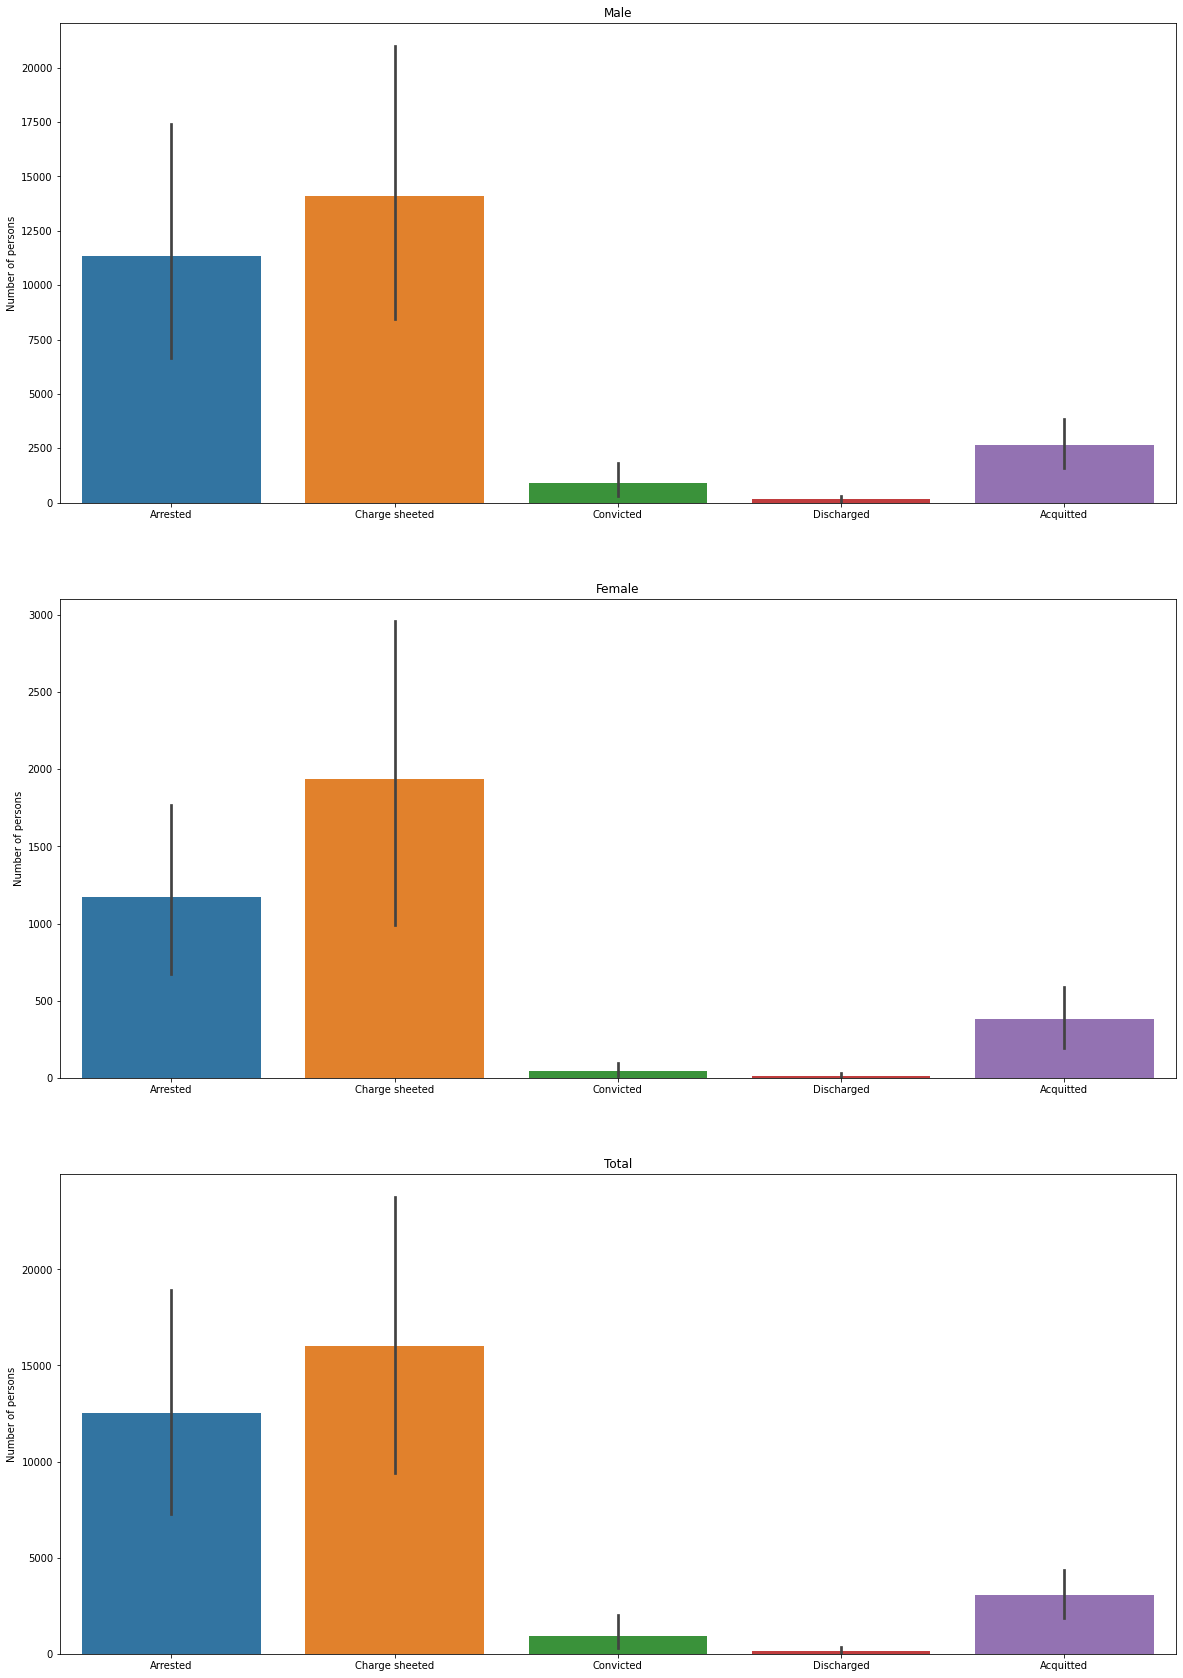

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(20, 30))

sns.barplot(df_m, ax=ax[0])
ax[0].set_title("Male")
ax[0].set_ylabel("Number of persons")

sns.barplot(df_f, ax=ax[1])
ax[1].set_title("Female")
ax[1].set_ylabel("Number of persons")

sns.barplot(df_t, ax=ax[2])
ax[2].set_title("Total")
ax[2].set_ylabel("Number of persons")

## 4. Box Plot

Here we are plotting the data of number of people in each category for **male**, **female** and **total**

Box plot displays a summary of a large amount of data in five numbers. These numbers include the median, upper quartile, lower quartile, minimum and maximum data values. It gives a clear summary and also displays outliers.

From the box plots below we can see that the data is skewed towards the lower quartile and hence the data above the upper quartile can be ignored and can be considered as outliers.

Text(0, 0.5, 'Number of persons')

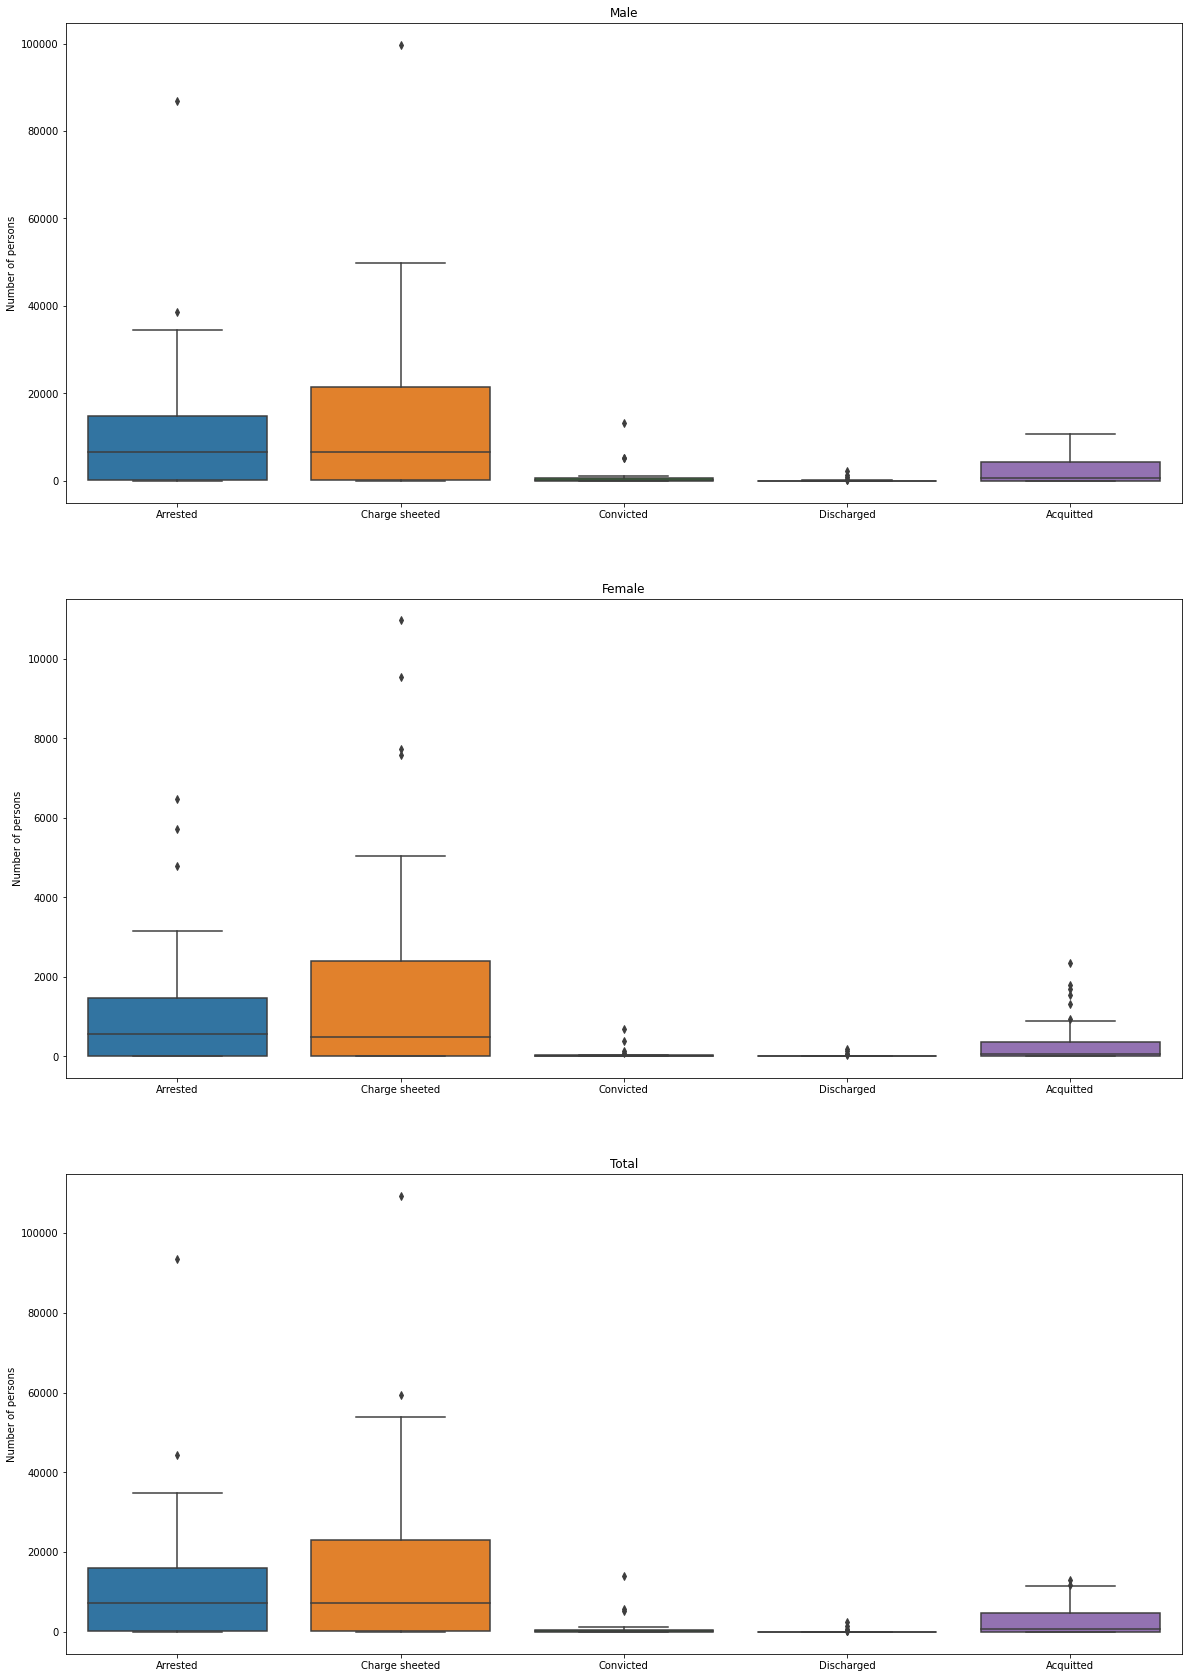

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(20, 30))

sns.boxplot(df_m, ax=ax[0])
ax[0].set_title("Male")
ax[0].set_ylabel("Number of persons")

sns.boxplot(df_f, ax=ax[1])
ax[1].set_title("Female")
ax[1].set_ylabel("Number of persons")

sns.boxplot(df_t, ax=ax[2])
ax[2].set_title("Total")
ax[2].set_ylabel("Number of persons")

## 5. Pair Plot

Here we are plotting the data of number of people in each category of the accused.

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

From the pair plot below we can see that the features with high correlation are (Arrested, Charge sheeted) and (Charge sheeted, Acquitted)

Text(0.5, 1.08, 'Pair Plot of all categories')

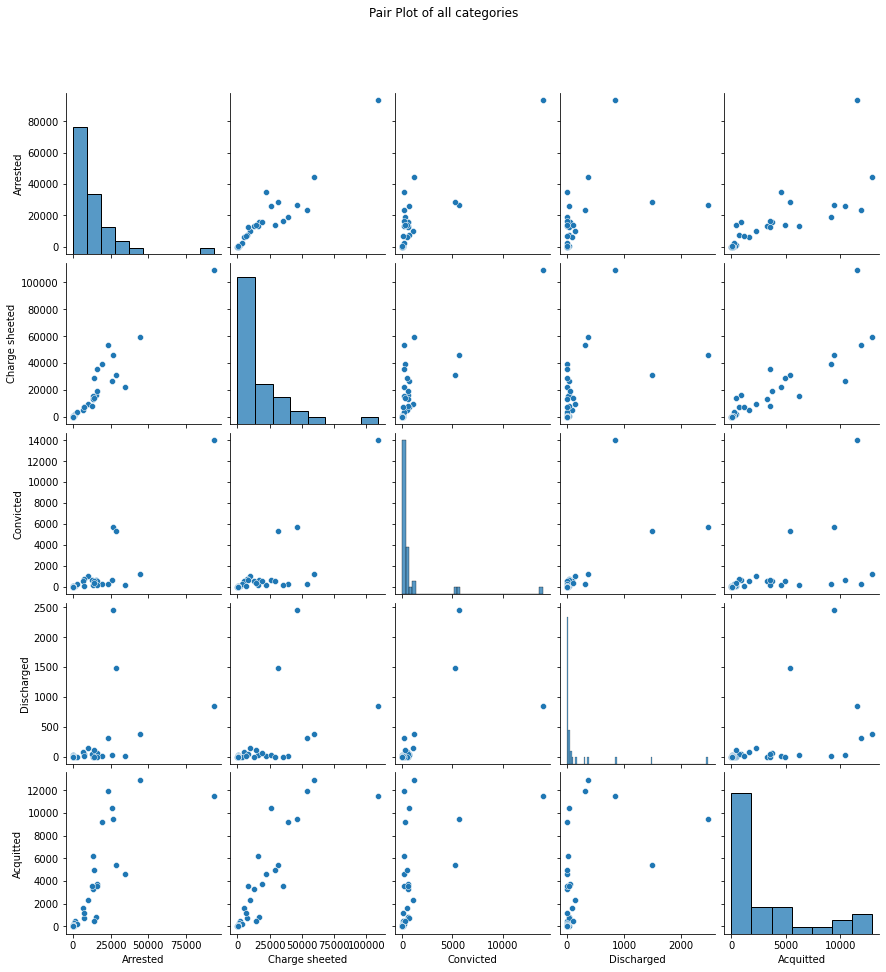

In [11]:
# sns.pairplot(df_m)
# sns.pairplot(df_f)
g = sns.pairplot(df_t)
g.fig.suptitle("Pair Plot of all categories", y=1.08)